In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
df=pd.read_csv('data for air pollution.csv',encoding = "ISO-8859-1")
df.head()

/Users/sakshambhati/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
print( "The number of records  or rows of the data is ",df.shape[0])
print("The number of fields and columns is ", df.shape[1])

The number of records  or rows of the data is  435742
The number of fields and columns is  13


In [4]:
print(" Number of Unique stations across India involved in collecing the data", df.stn_code.nunique())

 Number of Unique stations across India involved in collecing the data 803


In [5]:
print('Number of states ', df.state.nunique())

Number of states  37


In [6]:
df['date'] = df['date'].astype('str')
def get_year(s):
    if s == 'nan':
        return(0)
    return(int(s[0:4]))
convert = lambda x: get_year(x)
df['Year'] = df['date'].apply(convert)

In [7]:
set1 = df[['state', 'so2','no2','rspm','spm','Year']]

In [8]:
set1 = set1.copy()
so2_ave = round(set1['so2'].mean(), 2)
no2_ave = round(set1['no2'].mean(),2)
rspm_ave = round(set1['rspm'].mean(),2)
spm_ave = round(set1['spm'].mean(),2)
set1['so2'].fillna(so2_ave, inplace = True)
set1['no2'].fillna(no2_ave, inplace = True)
set1['rspm'].fillna(rspm_ave, inplace = True)
set1['spm'].fillna(spm_ave, inplace = True)

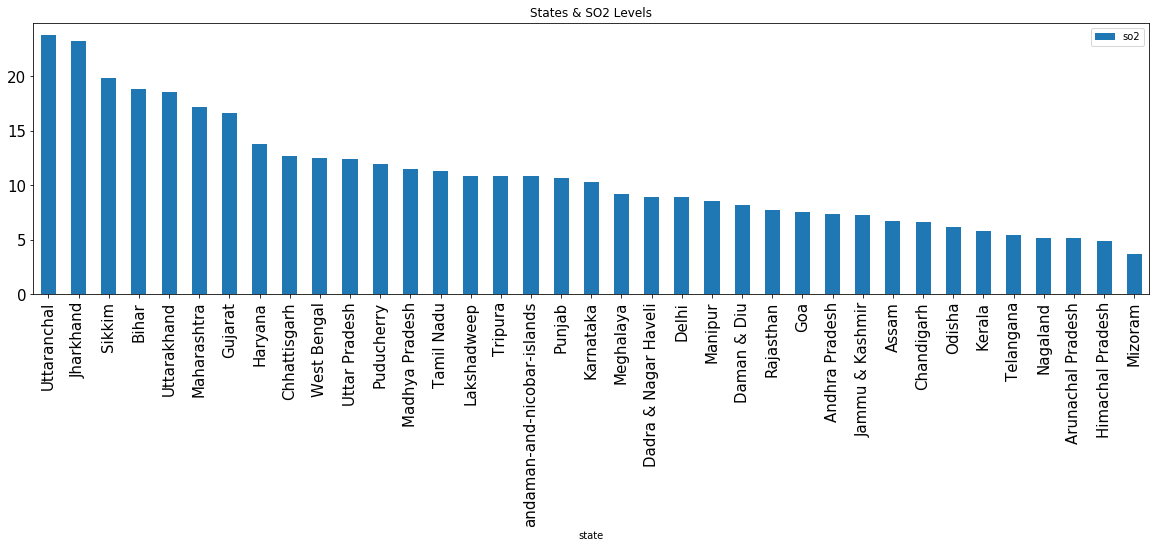

In [9]:
state_pollution = set1[['state', 'so2']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('so2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,5), x = 'state', fontsize= 15, title = 'States & SO2 Levels')
plt.show()

In [10]:
state_pollution.head(5)

,state,so2
34,Uttaranchal,23.724561
14,Jharkhand,23.235562
28,Sikkim,19.800000
3,Bihar,18.825160
33,Uttarakhand,18.571792


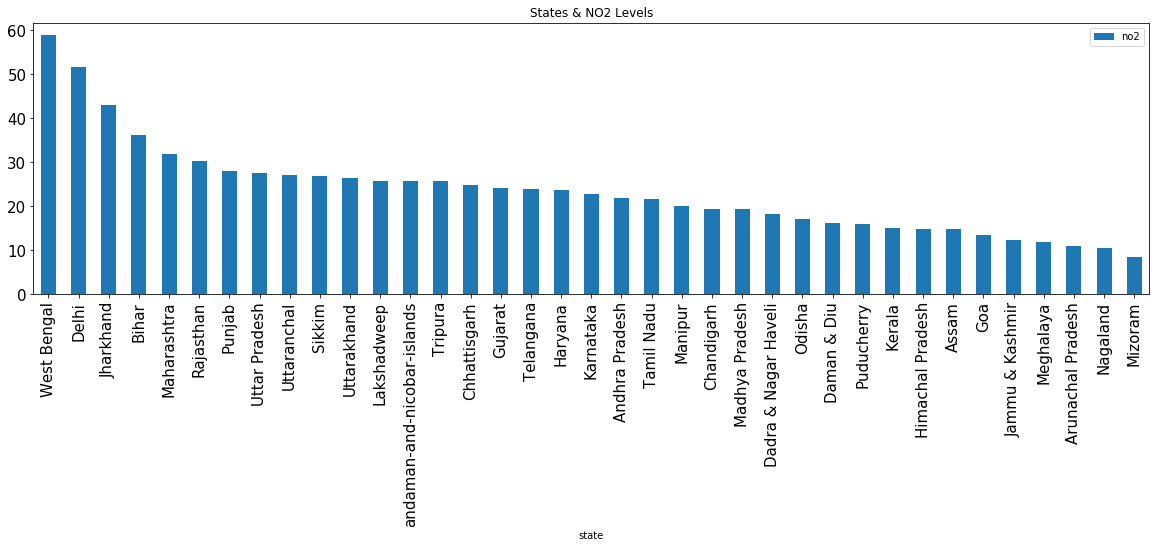

In [11]:
state_pollution = set1[['state', 'no2']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('no2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,5), x = 'state', fontsize= 15, title = 'States & NO2 Levels')
plt.show()

In [12]:
state_pollution.head()

,state,no2
35,West Bengal,58.852114
8,Delhi,51.728247
14,Jharkhand,42.975088
3,Bihar,36.173297
19,Maharashtra,31.988290


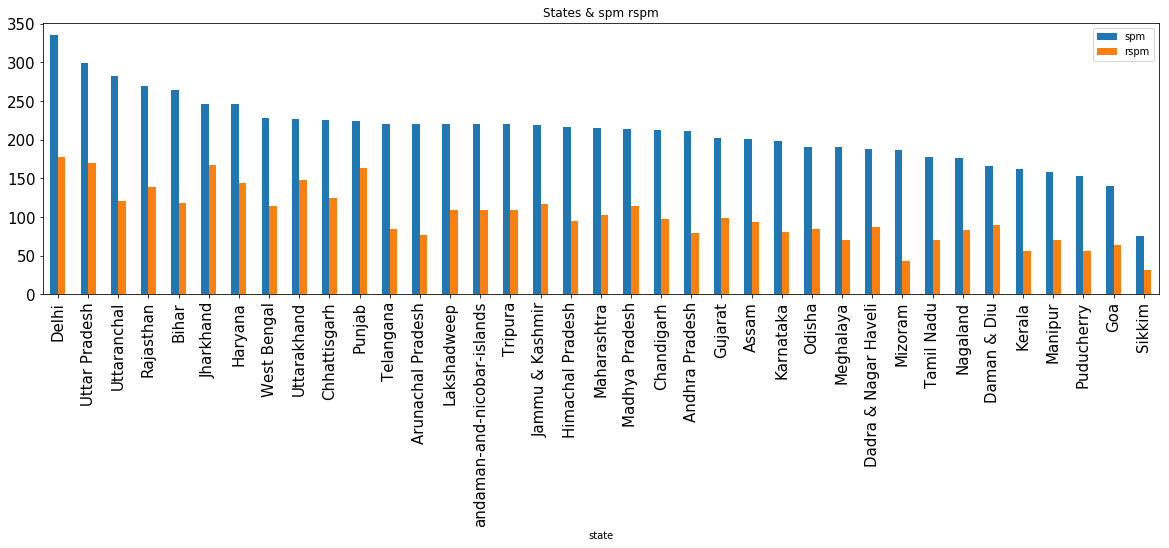

In [13]:
state_pollution = set1[['state', 'spm', 'rspm']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('spm', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,5), x = 'state', fontsize= 15, title = 'States & spm rspm')
plt.show()

In [14]:
state_pollution.head()

,state,spm,rspm
8,Delhi,334.813210,177.293073
32,Uttar Pradesh,298.970869,170.096482
34,Uttaranchal,282.238246,120.791579
27,Rajasthan,270.045573,138.599453
3,Bihar,264.702901,117.545873


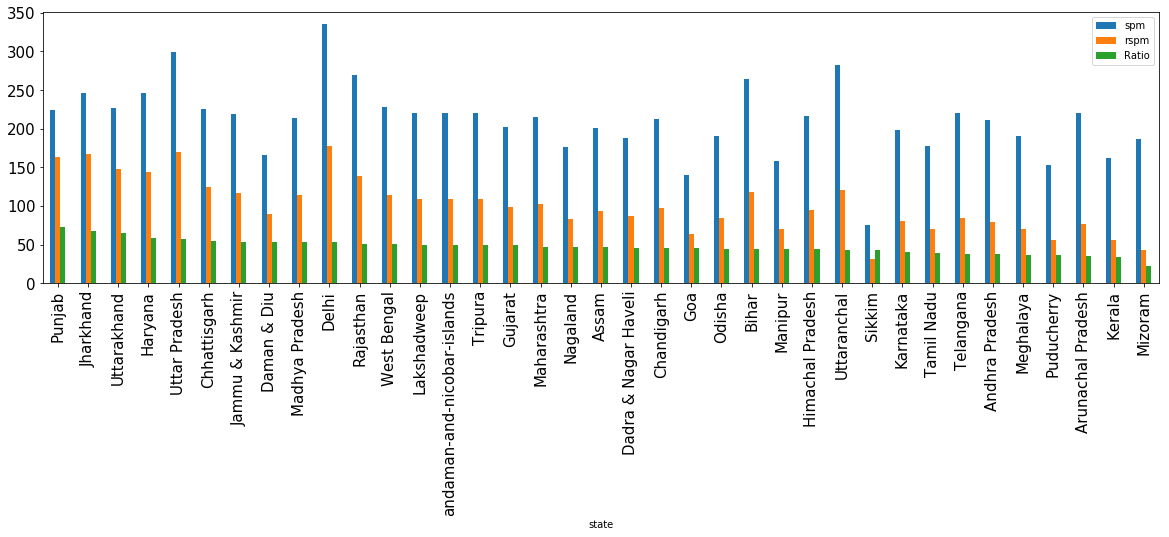

In [15]:
state_pollution['Ratio'] = round((state_pollution['rspm']/state_pollution['spm'])*100, 2)
state_pollution = state_pollution.sort_values('Ratio', ascending = False)
state_pollution.plot(kind = 'bar', figsize = (20, 5), fontsize = 15, x = 'state')
plt.show()

In [16]:
state_pollution.head(5)

,state,spm,rspm,Ratio
26,Punjab,224.252902,163.842335,73.06
14,Jharkhand,246.333765,167.607645,68.04
33,Uttarakhand,226.479776,148.078064,65.38
11,Haryana,245.633158,143.897912,58.58
32,Uttar Pradesh,298.970869,170.096482,56.89


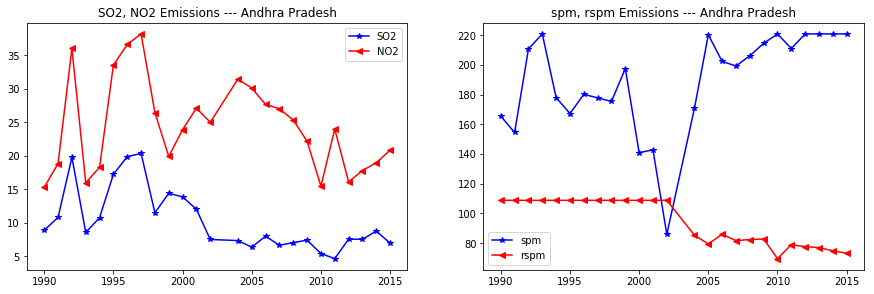

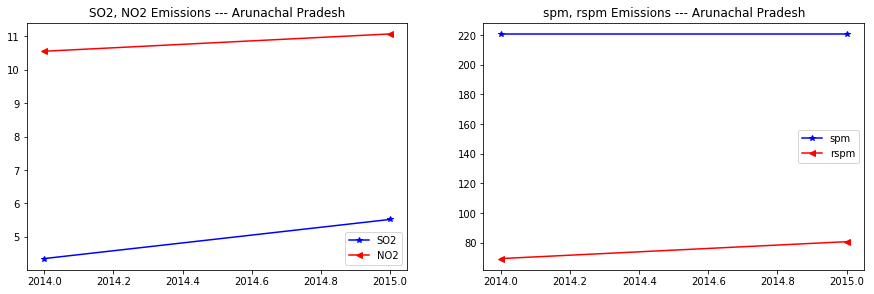

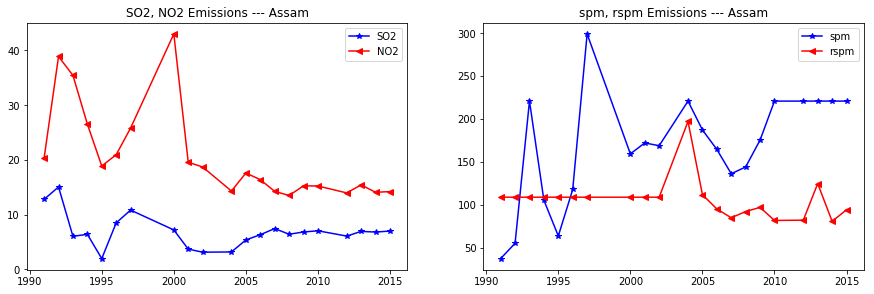

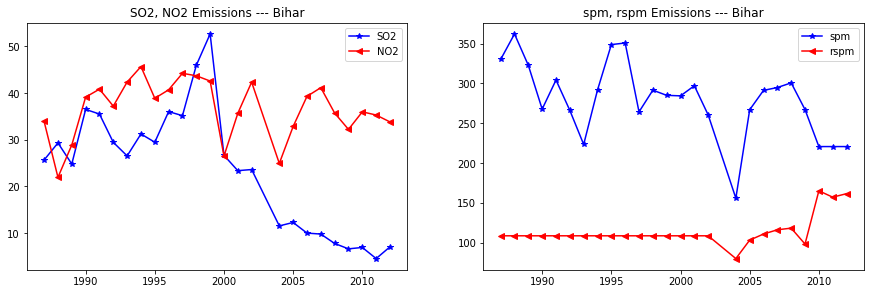

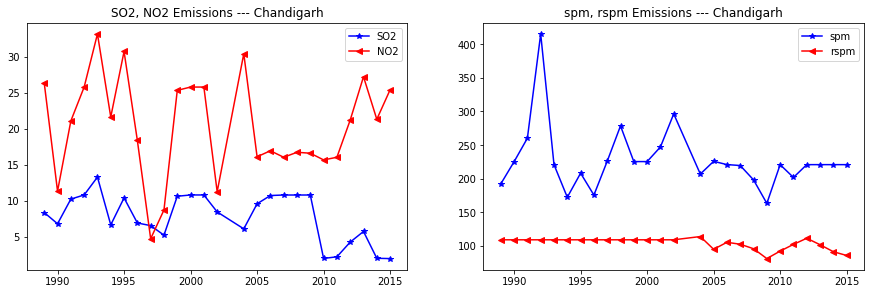

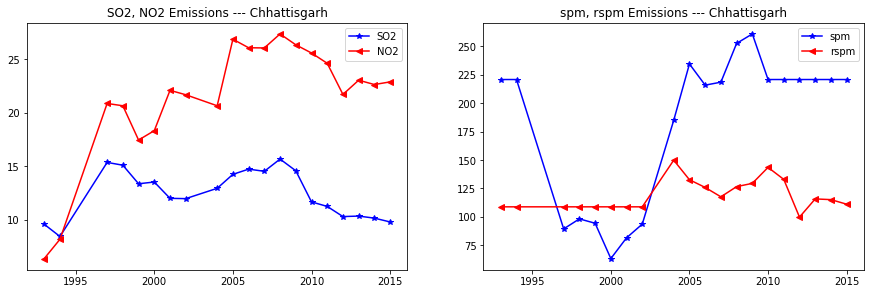

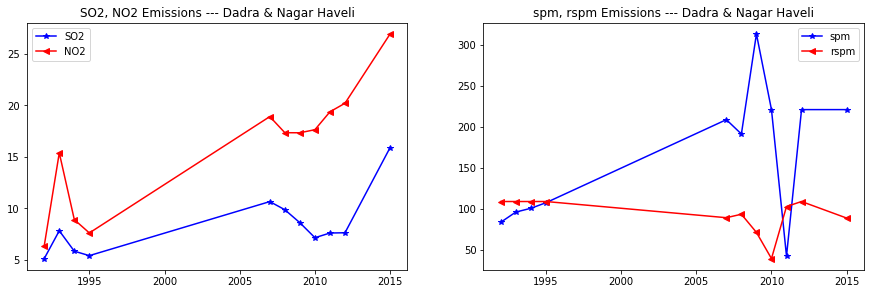

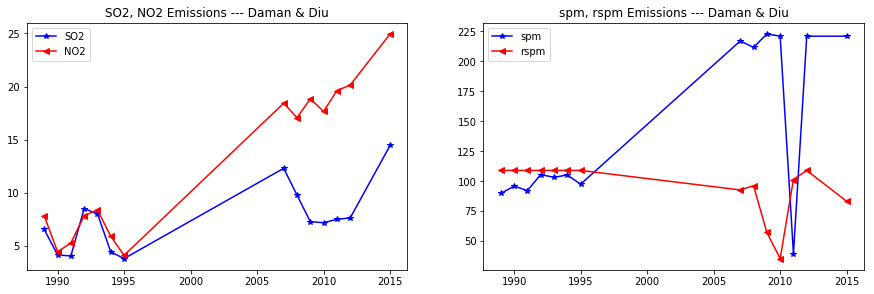

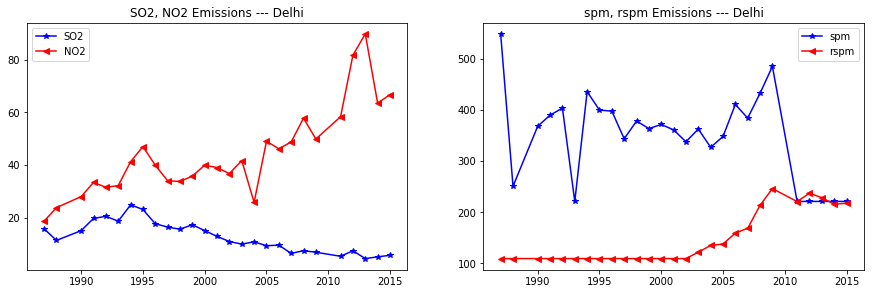

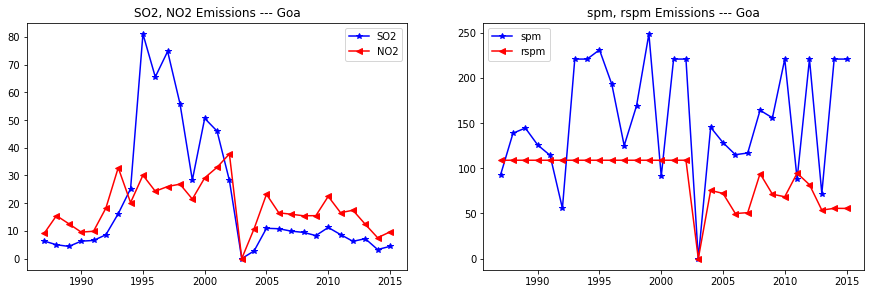

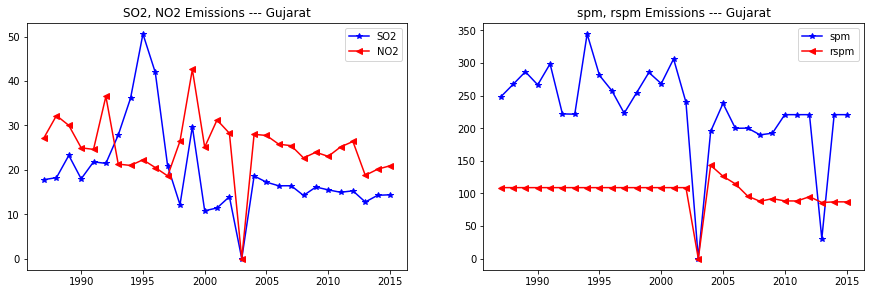

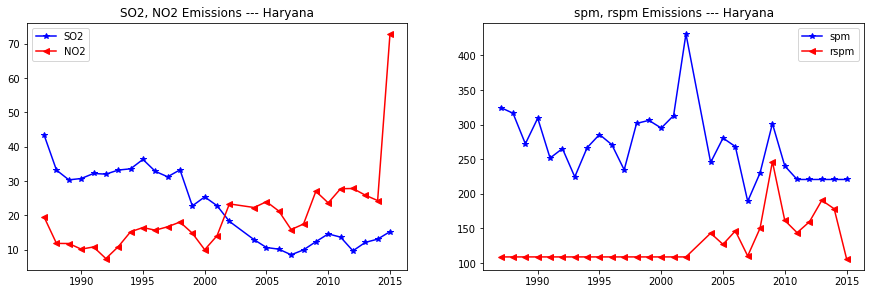

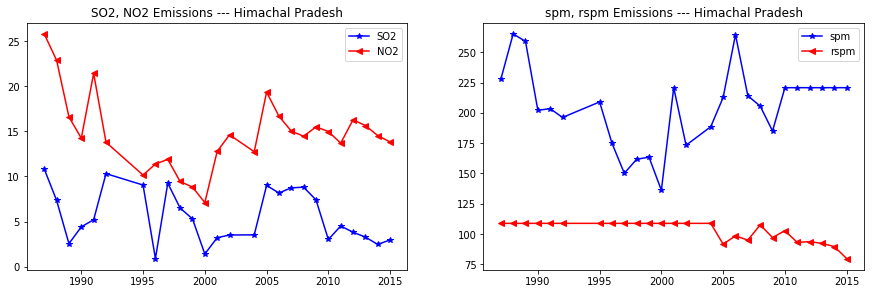

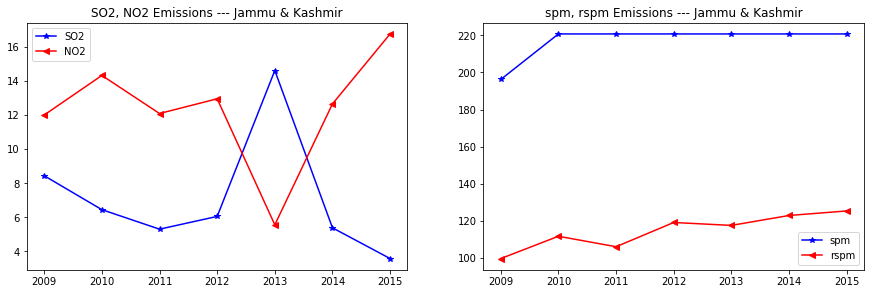

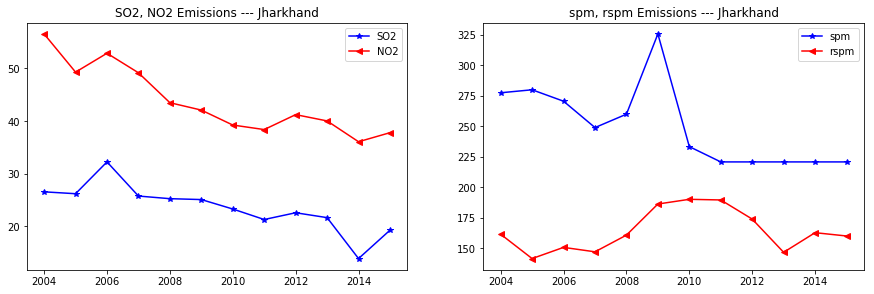

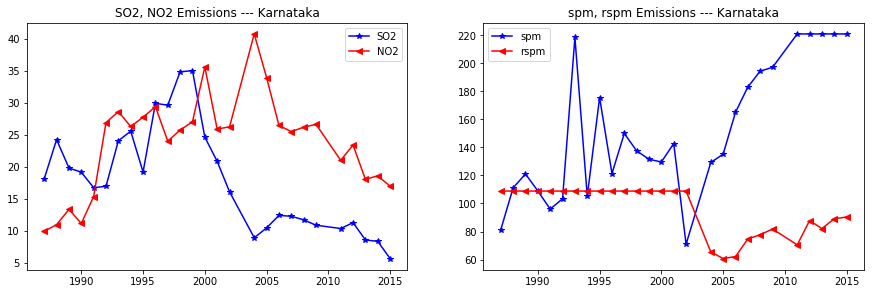

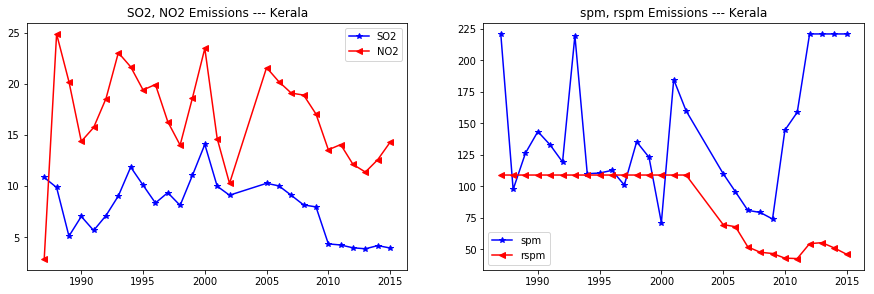

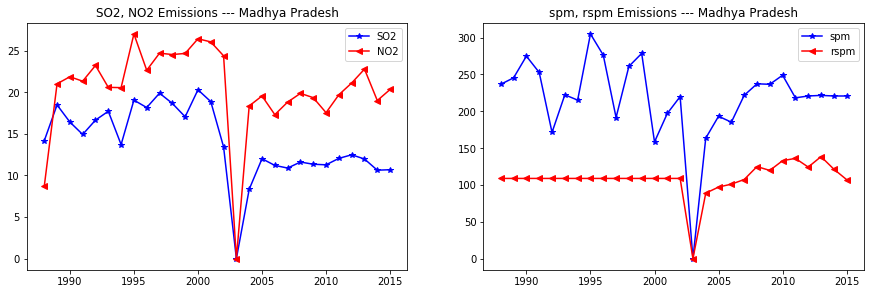

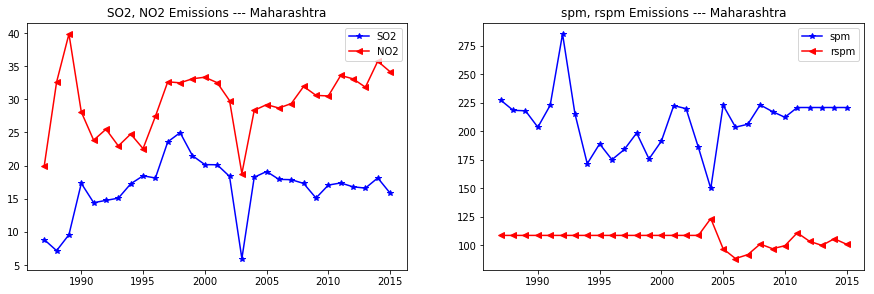

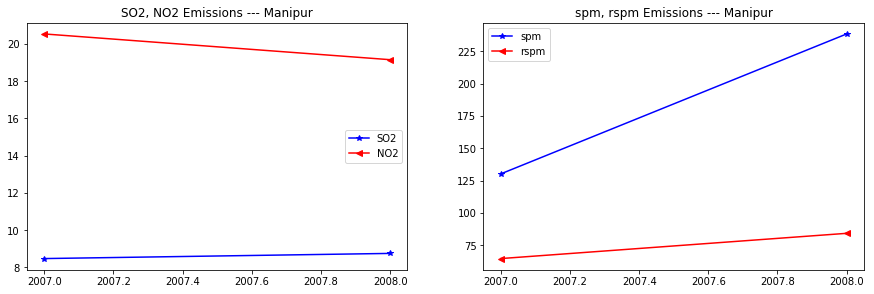

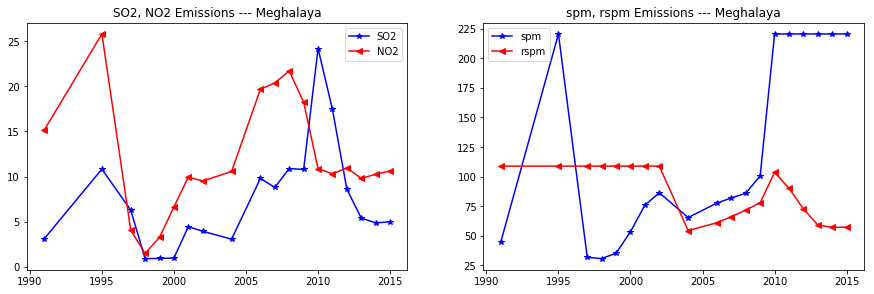

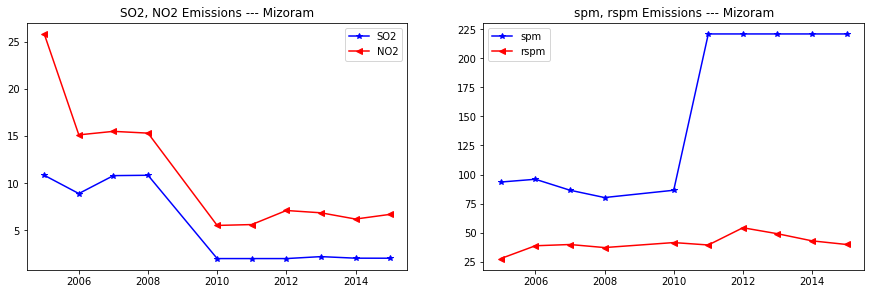

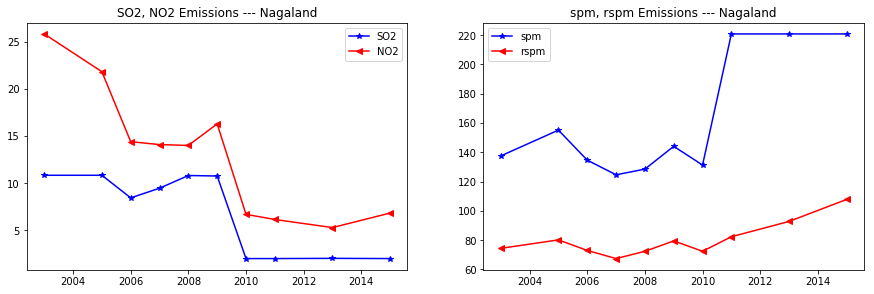

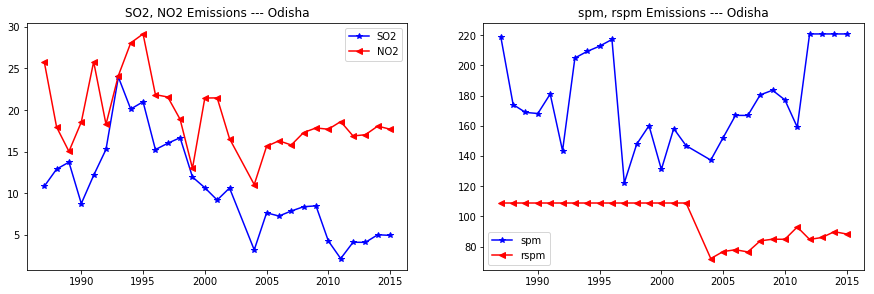

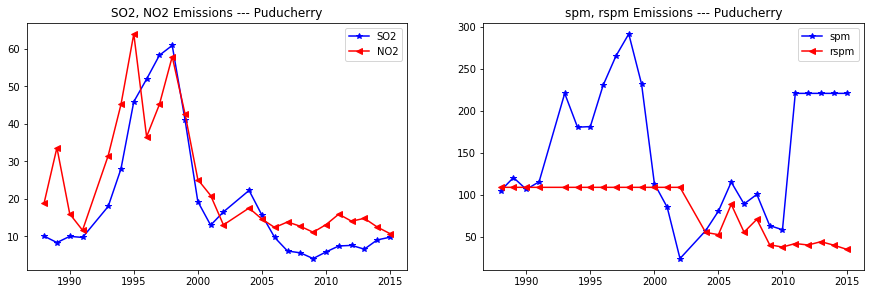

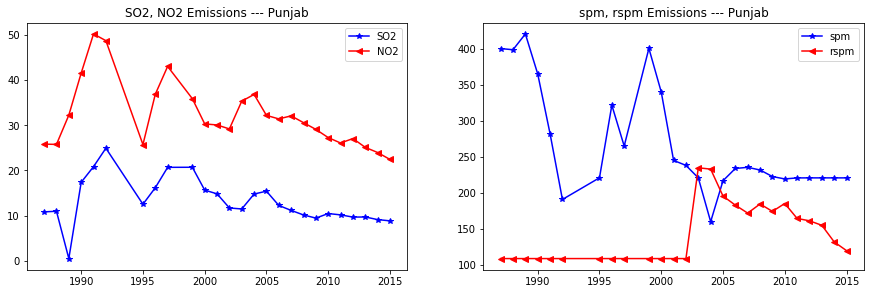

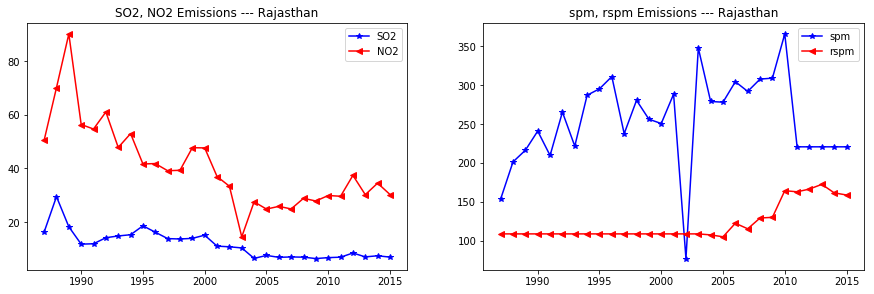

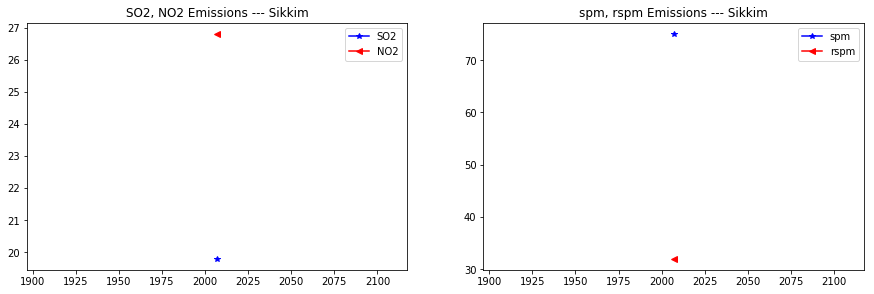

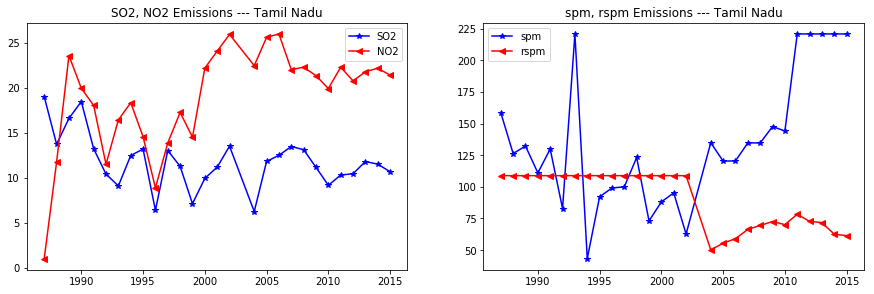

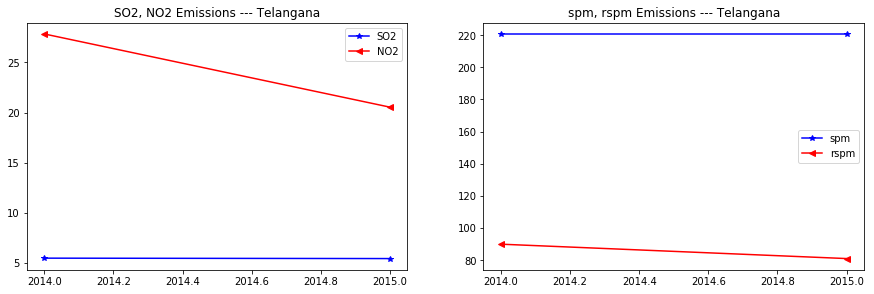

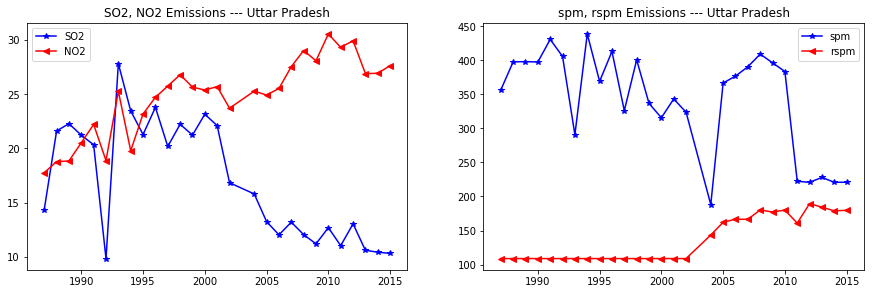

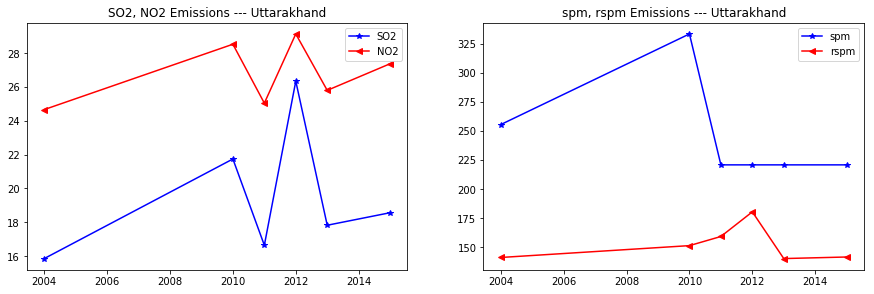

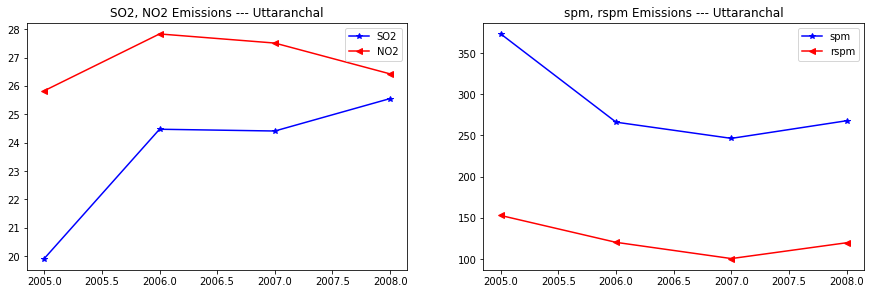

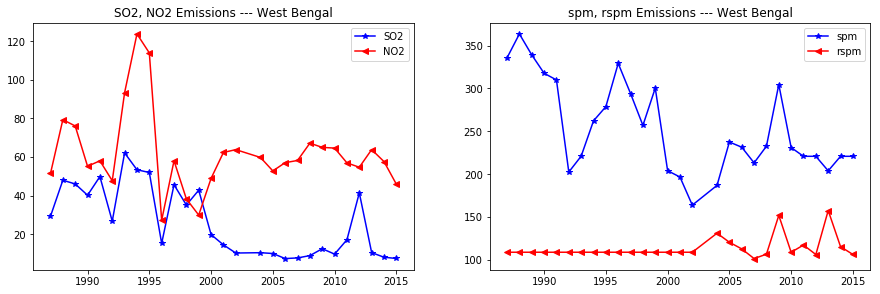

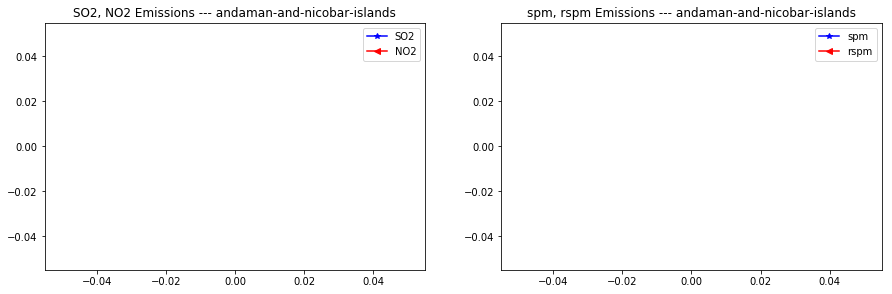

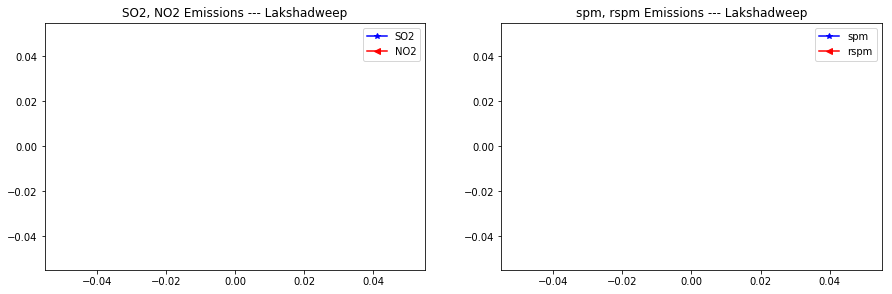

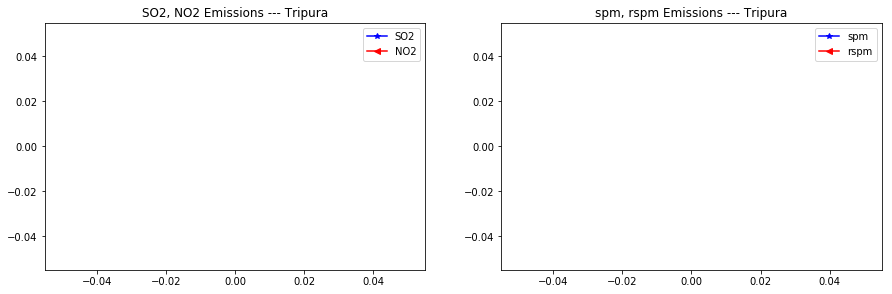

In [17]:
states = set1['state'].unique()
for st in states:
    state_set = set1[set1['state'] == st]
    state_set = state_set.groupby('Year').mean()
    state_set.reset_index(inplace = True)
    state_set = state_set[state_set['Year'] > 0]
    x = state_set['Year'].values
    y1 = state_set['so2'].values
    y2 = state_set['no2'].values
    y3 = state_set['spm'].values
    y4 = state_set['rspm'].values
    plt.figure(figsize = (15,10))
    plt.subplot(2,2,1)
    plt.plot(x, y1, marker = "*", color = 'b', label='SO2')
    plt.plot(x, y2, marker = "<", color = 'r', label = 'NO2')
    plt.title("SO2, NO2 Emissions --- "+str(st))
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(x, y3, marker = "*", color = 'b', label = 'spm')
    plt.plot(x, y4, marker = "<", color = 'r', label = 'rspm')
    plt.title("spm, rspm Emissions --- " + str(st))
    plt.legend()
    plt.show()


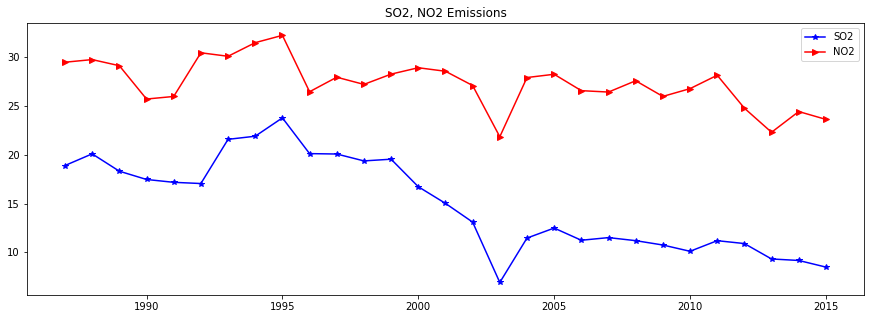

In [18]:
trace = set1[['Year', 'so2', 'no2']]
trace = trace[trace['Year'] != 0]
grouped = trace.groupby('Year').mean()
grouped.reset_index(inplace = True)
x = grouped.Year
y = grouped.so2
y1 = grouped.no2
plt.figure(figsize = (15,5))
plt.title("SO2, NO2 Emissions")
plt.plot(x, y, marker = "*", color = 'b', label = 'SO2')
plt.plot(x, y1, marker = ">", color = 'r', label = 'NO2')
plt.legend()
plt.show()

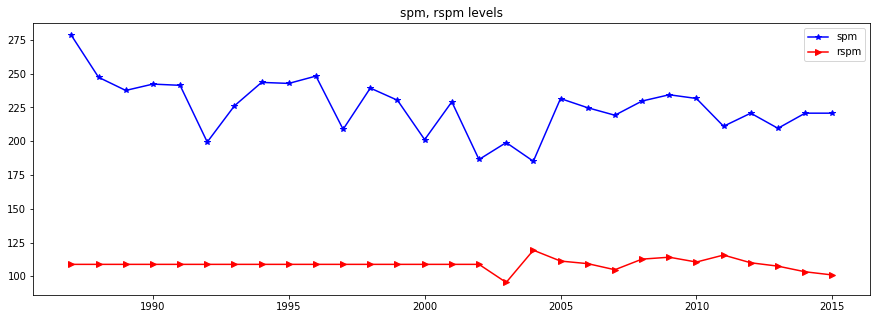

In [19]:
trace = set1[['Year', 'spm', 'rspm']]
trace = trace[trace['Year'] != 0]
grouped = trace.groupby('Year').mean()
grouped.reset_index(inplace = True)
x = grouped.Year
y = grouped.spm
y1 = grouped.rspm
plt.figure(figsize = (15,5))
plt.title("spm, rspm levels")
plt.plot(x, y, marker = "*", color = 'b', label = 'spm')
plt.plot(x, y1, marker = ">", color = 'r', label = 'rspm')
plt.legend()
plt.show()